Dosya Okuma

In [3]:
import pandas as pd
import numpy as np

akbank = pd.read_excel('/content/akbank.xlsx')
akbank.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1414538225671180032,1414532415335310080,2021-07-12 13:52:48 Türkiye Standart Saati,2021-07-12 00:00:00,13:52:48,300.0,8.667375e+17,serveterten5,FURKAN,NaN,@_yfas_ raporunuzda akbank yokmu,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/Serveterten5/status/141453...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_yfas_', 'name': 'Yatırım Fi...",NaN,NaN,NaN,NaN
1,1414537456603500032,1414537456603500032,2021-07-12 13:49:45 Türkiye Standart Saati,2021-07-12 00:00:00,13:49:45,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1414535761794299904,1414535761794299904,2021-07-12 13:43:01 Türkiye Standart Saati,2021-07-12 00:00:00,13:43:01,300.0,2.661164e+09,kozturkum,KozT,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...,tr,"[{'screen_name': 'akbankdestek', 'name': 'akba...",['https://www.paraanaliz.com/2021/yazarlar/ero...,[],0.0,0.0,0.0,[],[],https://twitter.com/kozturkum/status/141453576...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1414533960399529984,1414533960399529984,2021-07-12 13:35:51 Türkiye Standart Saati,2021-07-12 00:00:00,13:35:51,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,"@Akbank Merhaba, kredi kartımdan her ay dönem ...",tr,[],[],[],2.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1414530455752290048,1414530455752290048,2021-07-12 13:21:56 Türkiye Standart Saati,2021-07-12 00:00:00,13:21:56,300.0,9.702484e+17,beytullahaysol2,Beytullah,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/BeytullahAysol2/status/141...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
akbank.shape

(76992, 36)

In [ ]:
akbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76992 entries, 0 to 76991
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               76992 non-null  object 
 1   conversation_id  76989 non-null  object 
 2   created_at       76989 non-null  object 
 3   date             76989 non-null  object 
 4   time             76989 non-null  object 
 5   timezone         76989 non-null  float64
 6   user_id          76989 non-null  float64
 7   username         76989 non-null  object 
 8   name             76985 non-null  object 
 9   place            9 non-null      object 
 10  tweet            76989 non-null  object 
 11  language         76983 non-null  object 
 12  mentions         76977 non-null  object 
 13  urls             76983 non-null  object 
 14  photos           76983 non-null  object 
 15  replies_count    76977 non-null  float64
 16  retweets_count   76977 non-null  float64
 17  likes_count 

AUTOVİZ Library

In [ ]:
pip install autoviz

Shape of your Data Set loaded: (76992, 36)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  11
    Number of NLP String Columns =  2
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  12
    36 Predictors classified...
        This does not include the Target column(s)
        25 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


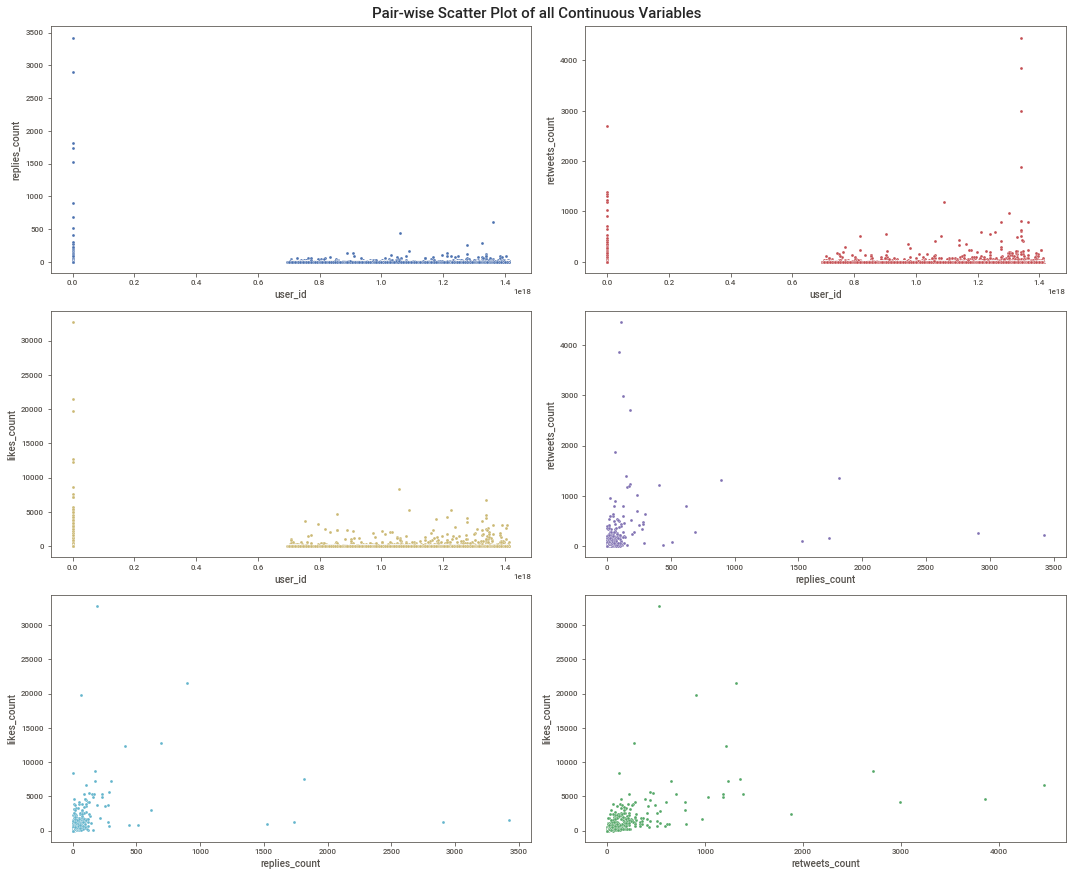

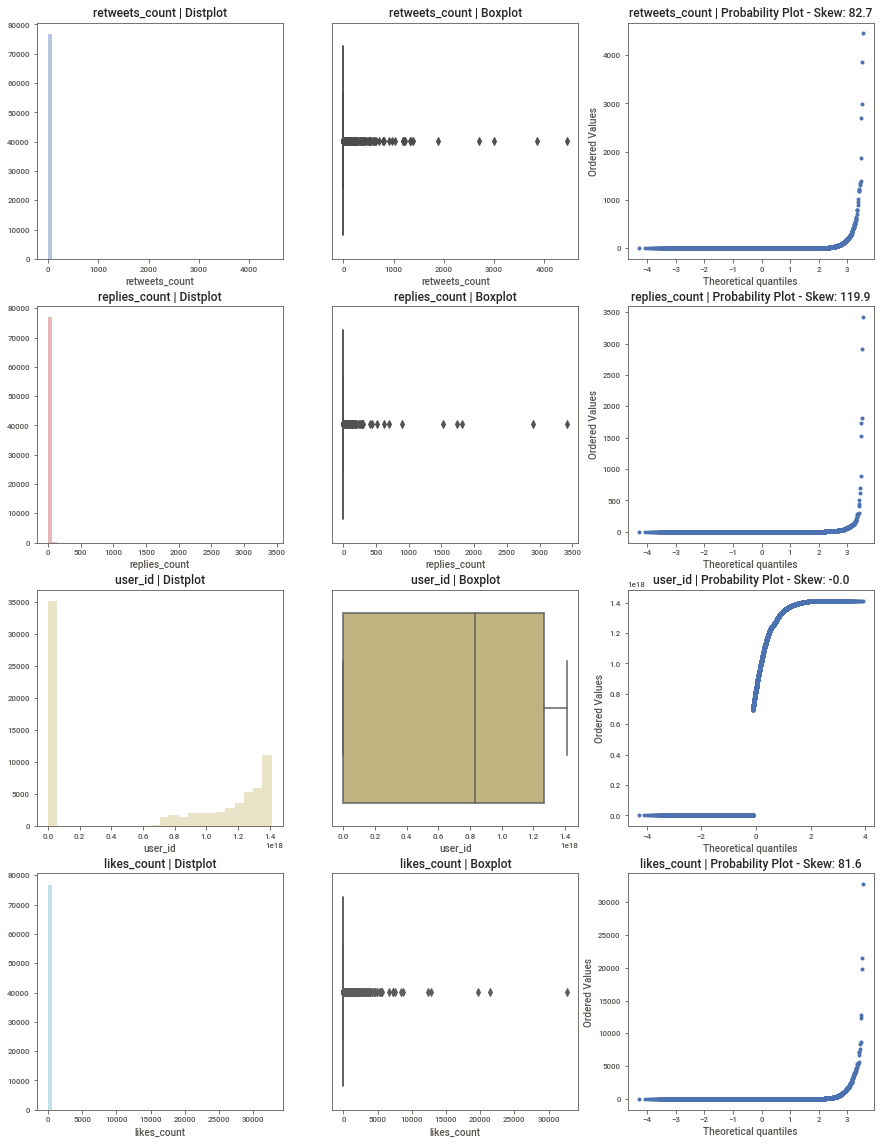

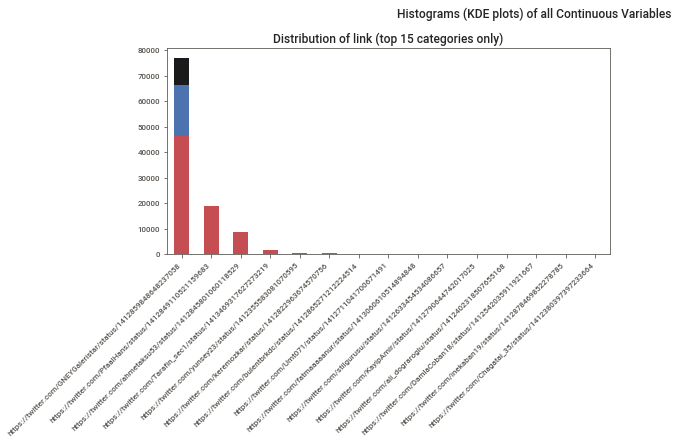

Could not draw Violin Plot


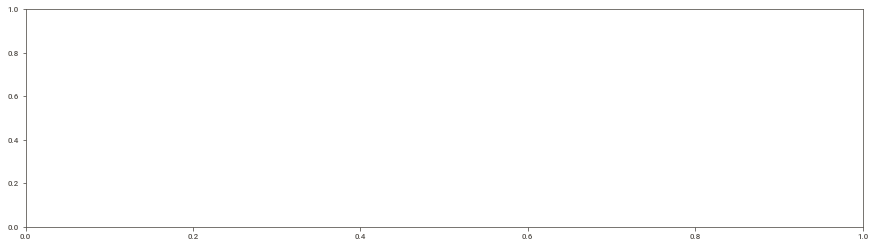

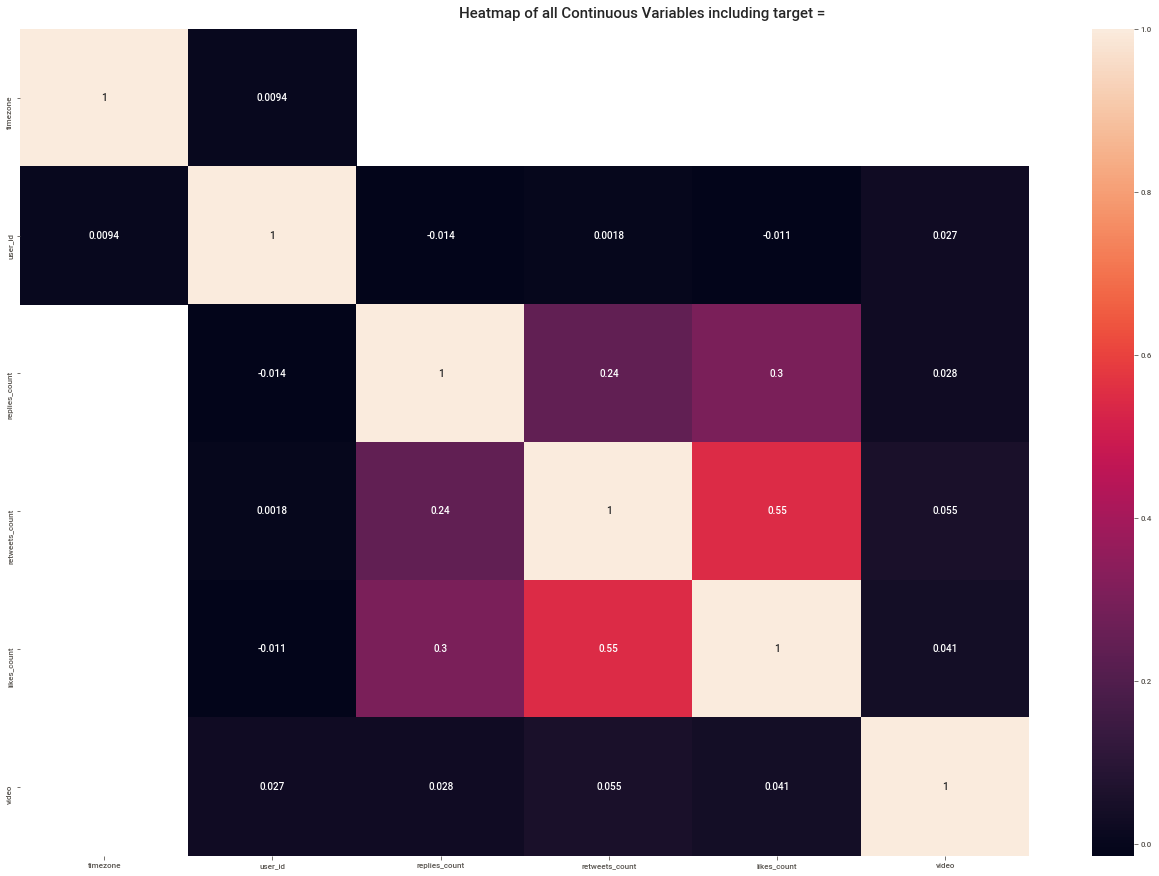

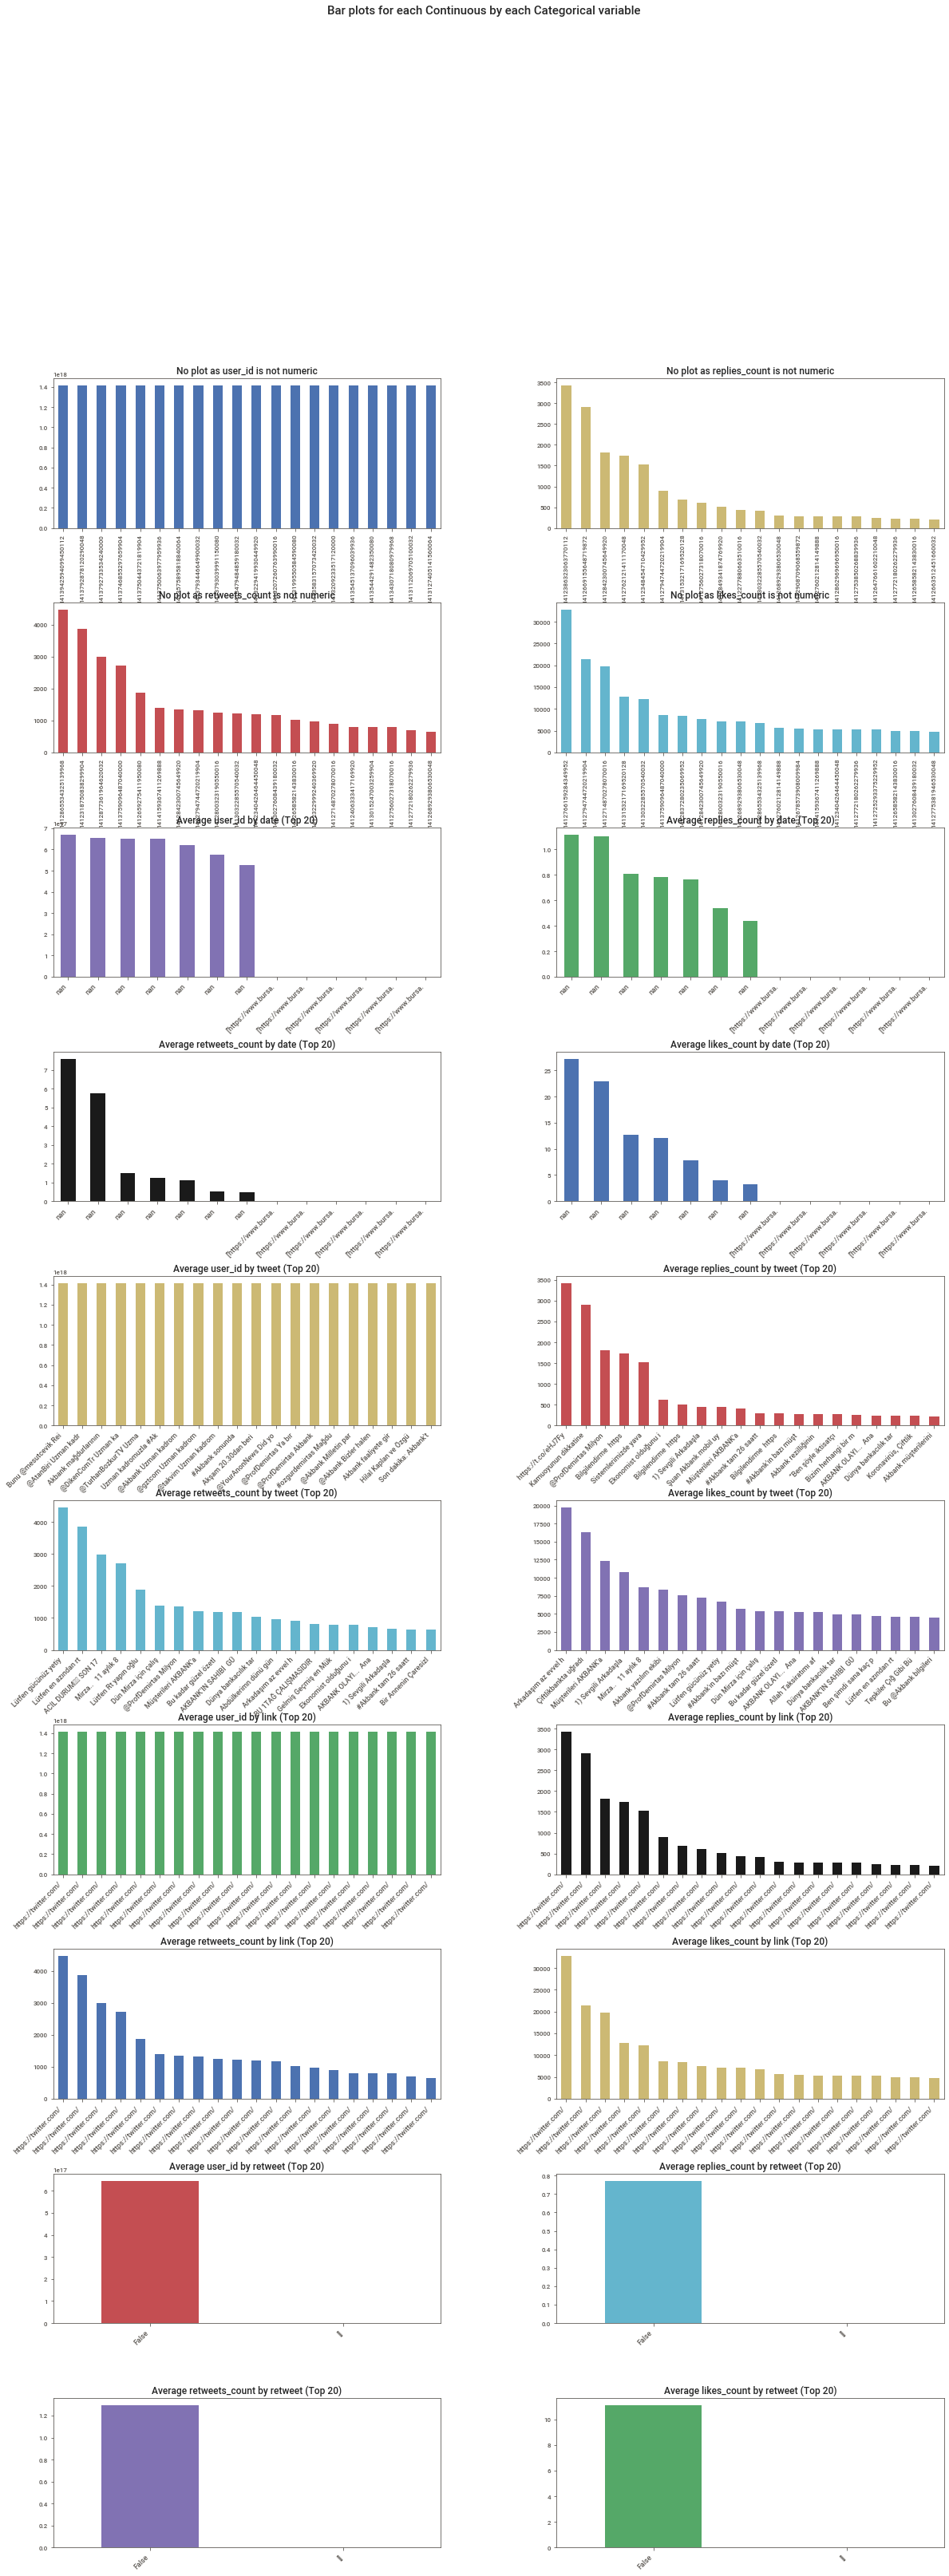

Time to run AutoViz (in seconds) = 71.490

 ###################### VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz('/content/akbank.xlsx')

Pandas-Profiling Colab

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
df = akbank.copy()
profile = ProfileReport(df, title="Pandas Profiling Report")

In [ ]:
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

SweetViz Library

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['conversation_id'] = pd.to_numeric(df['conversation_id'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['username'] = df['username'].astype(str)
df['name'] = df['name'].astype(str)
df['urls'] = df['urls'].astype(str)
df['quote_url'] = df['quote_url'].astype(str)

my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Dtale Library [dtale_app.USE_COLAB = True]

In [ ]:
pip install dtale

In [ ]:
import pandas as pd

import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

dtale.show(df)

https://q9dn1sdq3w-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s= df['tweet']
s = s.str.replace(r'[\d]+', '')
df.loc[:, 'tweet_cleaned'] = pd.Series(s, index=df.index, name='tweet_cleaned')
s = df[~pd.isnull(df['tweet'])]['tweet']
chart = pd.value_counts(s.str.split(expand=True).stack())
chart = chart.to_frame(name='data').sort_index()
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'tweet Word Value Counts'},
    'xaxis': {'title': {'text': 'tweet'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# for chart in charts:
#     chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)
figure

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s= df['tweet']
s = s.str.replace(r'[\d]+', '')
df.loc[:, 'tweet_cleaned'] = pd.Series(s, index=df.index, name='tweet_cleaned')
s = df[~pd.isnull(df['tweet'])]['tweet']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'tweet Value Counts'},
    'xaxis': {'title': {'text': 'tweet'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))
figure
# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# for chart in charts:
#     chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)

In [ ]:
s = df['time']
s = s.replace({
	np.nan: "yok",
})
s

0        yok
1        yok
2        yok
3        yok
4        yok
        ... 
76987    yok
76988    yok
76989    yok
76990    yok
76991    yok
Name: time, Length: 76992, dtype: object

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s= df['tweet']
s = s.str.replace(r'[\d]+', '')
df.loc[:, 'tweet_cleaned'] = pd.Series(s, index=df.index, name='tweet_cleaned')
df = df.rename(columns={'date': 'tarih'})

In [ ]:
df.head()

,id,conversation_id,created_at,tarih,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_cleaned
0,1.414538e+18,1.414532e+18,2021-07-12 13:52:48 Türkiye Standart Saati,2021-07-12,NaT,300.0,8.667375e+17,serveterten5,FURKAN,NaN,@_yfas_ raporunuzda akbank yokmu,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/Serveterten5/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_yfas_', 'name': 'Yatırım Fi...",NaN,NaN,NaN,NaN,@_yfas_ raporunuzda akbank yokmu
1,1.414537e+18,1.414537e+18,2021-07-12 13:49:45 Türkiye Standart Saati,2021-07-12,NaT,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...
2,1.414536e+18,1.414536e+18,2021-07-12 13:43:01 Türkiye Standart Saati,2021-07-12,NaT,300.0,2.661164e+09,kozturkum,KozT,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...,tr,"[{'screen_name': 'akbankdestek', 'name': 'akba...",['https://www.paraanaliz.com/2021/yazarlar/ero...,[],0.0,0.0,0.0,[],[],https://twitter.com/kozturkum/status/141453576...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...
3,1.414534e+18,1.414534e+18,2021-07-12 13:35:51 Türkiye Standart Saati,2021-07-12,NaT,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,"@Akbank Merhaba, kredi kartımdan her ay dönem ...",tr,[],[],[],2.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"@Akbank Merhaba, kredi kartımdan her ay dönem ..."
4,1.414530e+18,1.414530e+18,2021-07-12 13:21:56 Türkiye Standart Saati,2021-07-12,NaT,300.0,9.702484e+17,beytullahaysol2,Beytullah,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/BeytullahAysol2/status/141...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...


In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s= df['tweet']
s = s.str.replace(r'[\d]+', '')
df.loc[:, 'tweet_cleaned'] = pd.Series(s, index=df.index, name='tweet_cleaned')
df = df.rename(columns={'date': 'tarih'})
df = df[[c for c in df.columns if c not in ['date']]]
df.head()

,id,conversation_id,created_at,tarih,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_cleaned
0,1.414538e+18,1.414532e+18,2021-07-12 13:52:48 Türkiye Standart Saati,2021-07-12,NaT,300.0,8.667375e+17,serveterten5,FURKAN,NaN,@_yfas_ raporunuzda akbank yokmu,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/Serveterten5/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_yfas_', 'name': 'Yatırım Fi...",NaN,NaN,NaN,NaN,@_yfas_ raporunuzda akbank yokmu
1,1.414537e+18,1.414537e+18,2021-07-12 13:49:45 Türkiye Standart Saati,2021-07-12,NaT,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...
2,1.414536e+18,1.414536e+18,2021-07-12 13:43:01 Türkiye Standart Saati,2021-07-12,NaT,300.0,2.661164e+09,kozturkum,KozT,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...,tr,"[{'screen_name': 'akbankdestek', 'name': 'akba...",['https://www.paraanaliz.com/2021/yazarlar/ero...,[],0.0,0.0,0.0,[],[],https://twitter.com/kozturkum/status/141453576...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...
3,1.414534e+18,1.414534e+18,2021-07-12 13:35:51 Türkiye Standart Saati,2021-07-12,NaT,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,"@Akbank Merhaba, kredi kartımdan her ay dönem ...",tr,[],[],[],2.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"@Akbank Merhaba, kredi kartımdan her ay dönem ..."
4,1.414530e+18,1.414530e+18,2021-07-12 13:21:56 Türkiye Standart Saati,2021-07-12,NaT,300.0,9.702484e+17,beytullahaysol2,Beytullah,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/BeytullahAysol2/status/141...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...


In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

duplicates = df.duplicated(['username'], keep='first')
df = df[~duplicates]
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s= df['tweet']
s = s.str.replace(r'[\d]+', '')
df.loc[:, 'tweet_cleaned'] = pd.Series(s, index=df.index, name='tweet_cleaned')
df = df.rename(columns={'date': 'tarih'})
df = df[[c for c in df.columns if c not in ['date']]]

In [ ]:
df.head()

,id,conversation_id,created_at,tarih,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_cleaned
0,1.414538e+18,1.414532e+18,2021-07-12 13:52:48 Türkiye Standart Saati,2021-07-12,NaT,300.0,8.667375e+17,serveterten5,FURKAN,NaN,@_yfas_ raporunuzda akbank yokmu,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/Serveterten5/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '_yfas_', 'name': 'Yatırım Fi...",NaN,NaN,NaN,NaN,@_yfas_ raporunuzda akbank yokmu
1,1.414537e+18,1.414537e+18,2021-07-12 13:49:45 Türkiye Standart Saati,2021-07-12,NaT,300.0,5.354317e+08,atamannurgul,nurgül ataman,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/AtamanNurgul/status/141453...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank Otomatik ödeme talimatı bilmem ne faiz...
2,1.414536e+18,1.414536e+18,2021-07-12 13:43:01 Türkiye Standart Saati,2021-07-12,NaT,300.0,2.661164e+09,kozturkum,KozT,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...,tr,"[{'screen_name': 'akbankdestek', 'name': 'akba...",['https://www.paraanaliz.com/2021/yazarlar/ero...,[],0.0,0.0,0.0,[],[],https://twitter.com/kozturkum/status/141453576...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@Akbank @AkbankDestek @bddkbankacilik @csgbaka...
3,1.414530e+18,1.414530e+18,2021-07-12 13:21:56 Türkiye Standart Saati,2021-07-12,NaT,300.0,9.702484e+17,beytullahaysol2,Beytullah,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...,tr,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/BeytullahAysol2/status/141...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,@CivelekB burcu hanım bankanız la alakalı büyü...
4,1.414530e+18,1.414530e+18,2021-07-12 13:18:57 Türkiye Standart Saati,2021-07-12,NaT,300.0,1.324811e+18,30vezonguldak,Zonguldak İsmet,NaN,Ee Akbank niye çalışmıyormuş? Sistemsel arıza ...,tr,[],[],[],0.0,0.0,1.0,[],[],https://twitter.com/30veZonguldak/status/14145...,False,nan,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ee Akbank niye çalışmıyormuş? Sistemsel arıza ...


TextHero Library

In [2]:
akbank['language'].value_counts()

tr       73027
und       2284
en         497
in         280
hu         250
tl         161
ht          91
es          61
cs          44
nl          36
it          25
pt          24
et          20
fr          19
eu          16
ca          15
da          14
ar          13
sv          11
el          11
de          11
is          10
ro          10
lt           8
cy           8
hi           7
False        6
fi           6
pl           5
no           4
ja           3
vi           2
lv           2
sl           1
ru           1
Name: language, dtype: int64

In [4]:
akbank_en = akbank[akbank['language'] == 'en']
akbank_en.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
31,1414505843891079936,1414505843891079936,2021-07-12 11:44:08 Türkiye Standart Saati,2021-07-12 00:00:00,11:44:08,300.0,9.205248e+07,murat3092,Murat Yıldız,NaN,Instagram takip 👉@finansci_baba #borsa #hisses...,en,[],[],['https://pbs.twimg.com/media/E6FVgPWXsAAmy3H....,0.0,0.0,2.0,"['borsa', 'hissesenedi', 'yatırım', 'garan', '...",[],https://twitter.com/murat3092/status/141450584...,False,NaN,1.0,https://pbs.twimg.com/media/E6FVgPWXsAAmy3H.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
413,1413990059217489920,1413940278508009984,2021-07-11 01:34:35 Türkiye Standart Saati,2021-07-11 00:00:00,01:34:35,300.0,1.359501e+18,halidkaradag,XoLiT,NaN,@JackWel5 @crypto_invasion @SEC_Enforcement I ...,en,[],[],[],2.0,0.0,2.0,[],[],https://twitter.com/HalidKaradag/status/141399...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JackWel5', 'name': 'Jack Wel...",NaN,NaN,NaN,NaN
437,1413970791969029888,1413908526653639936,2021-07-11 00:18:01 Türkiye Standart Saati,2021-07-11 00:00:00,00:18:01,300.0,1.335399e+18,medsans24,Just M :),NaN,@YourAnonNews @Akbank Heeelp!!!! #SOSCuba #Sos...,en,[],[],[],1.0,0.0,2.0,"['soscuba', 'sosmatanzas', 'soscuba', 'sosmata...",[],https://twitter.com/MeDSans24/status/141397079...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN
445,1413964912678759936,1413908526653639936,2021-07-10 23:54:40 Türkiye Standart Saati,2021-07-10 00:00:00,23:54:40,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank @yuma_mcas require a sho...,en,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN
446,1413964685208989952,1413908526653639936,2021-07-10 23:53:45 Türkiye Standart Saati,2021-07-10 00:00:00,23:53:45,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank Open fire. @yuma_mcas,en,"[{'screen_name': 'yuma_mcas', 'name': 'mcas yu...",[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN


In [3]:
akbank_en.to_excel('akbank_en_datalarim.xlsx')

In [4]:
akbank_en.shape

(497, 36)

In [ ]:
pip install texthero

In [ ]:


    remove_digits() Remove all blocks of digits.
    remove_punctuation() Remove all string.punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~).
    remove_diacritics() Remove all accents from strings.
    remove_stopwords() Remove all stop words.



In [6]:
import texthero as hero
import pandas as pd

from texthero import preprocessing

custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_digits,
                   preprocessing.remove_html_tags,
                   preprocessing.remove_urls,]
akbank_en['clean_tweet'] = hero.clean(akbank_en['tweet'], custom_pipeline)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
akbank_en.to_excel('akbank_en.xlsx')

In [7]:
akbank_en.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet
31,1414505843891079936,1414505843891079936,2021-07-12 11:44:08 Türkiye Standart Saati,2021-07-12 00:00:00,11:44:08,300.0,9.205248e+07,murat3092,Murat Yıldız,NaN,Instagram takip 👉@finansci_baba #borsa #hisses...,en,[],[],['https://pbs.twimg.com/media/E6FVgPWXsAAmy3H....,0.0,0.0,2.0,"['borsa', 'hissesenedi', 'yatırım', 'garan', '...",[],https://twitter.com/murat3092/status/141450584...,False,NaN,1.0,https://pbs.twimg.com/media/E6FVgPWXsAAmy3H.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,instagram takip finansci baba borsa hissese...
413,1413990059217489920,1413940278508009984,2021-07-11 01:34:35 Türkiye Standart Saati,2021-07-11 00:00:00,01:34:35,300.0,1.359501e+18,halidkaradag,XoLiT,NaN,@JackWel5 @crypto_invasion @SEC_Enforcement I ...,en,[],[],[],2.0,0.0,2.0,[],[],https://twitter.com/HalidKaradag/status/141399...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JackWel5', 'name': 'Jack Wel...",NaN,NaN,NaN,NaN,jackwel5 crypto invasion sec enforcement k...
437,1413970791969029888,1413908526653639936,2021-07-11 00:18:01 Türkiye Standart Saati,2021-07-11 00:00:00,00:18:01,300.0,1.335399e+18,medsans24,Just M :),NaN,@YourAnonNews @Akbank Heeelp!!!! #SOSCuba #Sos...,en,[],[],[],1.0,0.0,2.0,"['soscuba', 'sosmatanzas', 'soscuba', 'sosmata...",[],https://twitter.com/MeDSans24/status/141397079...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank heeelp soscuba sosmat...
445,1413964912678759936,1413908526653639936,2021-07-10 23:54:40 Türkiye Standart Saati,2021-07-10 00:00:00,23:54:40,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank @yuma_mcas require a sho...,en,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank yuma mcas require shor...
446,1413964685208989952,1413908526653639936,2021-07-10 23:53:45 Türkiye Standart Saati,2021-07-10 00:00:00,23:53:45,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank Open fire. @yuma_mcas,en,"[{'screen_name': 'yuma_mcas', 'name': 'mcas yu...",[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank open fire yuma mcas


In [8]:
 hero.named_entities(akbank_en['clean_tweet'] )

31                               [(instagram, NORP, 0, 9)]
413      [(sec, ORG, 28, 31), (sweden, GPE, 71, 77), (t...
437                                                     []
445                                                     []
446                                                     []
                               ...                        
75648                                                   []
75668                                                   []
75696                                                   []
75724       [(cyber attack     13th hour, PERSON, 61, 87)]
76463                                                   []
Length: 497, dtype: object

In [10]:
NUM_TOP_WORDS = 10
hero.top_words(akbank_en['clean_tweet'])[:NUM_TOP_WORDS]

akbank             547
co                 241
bank                75
littlebulltoken     57
turkey              44
bitcoin             38
hours               32
good                32
system              30
loading             29
Name: clean_tweet, dtype: int64

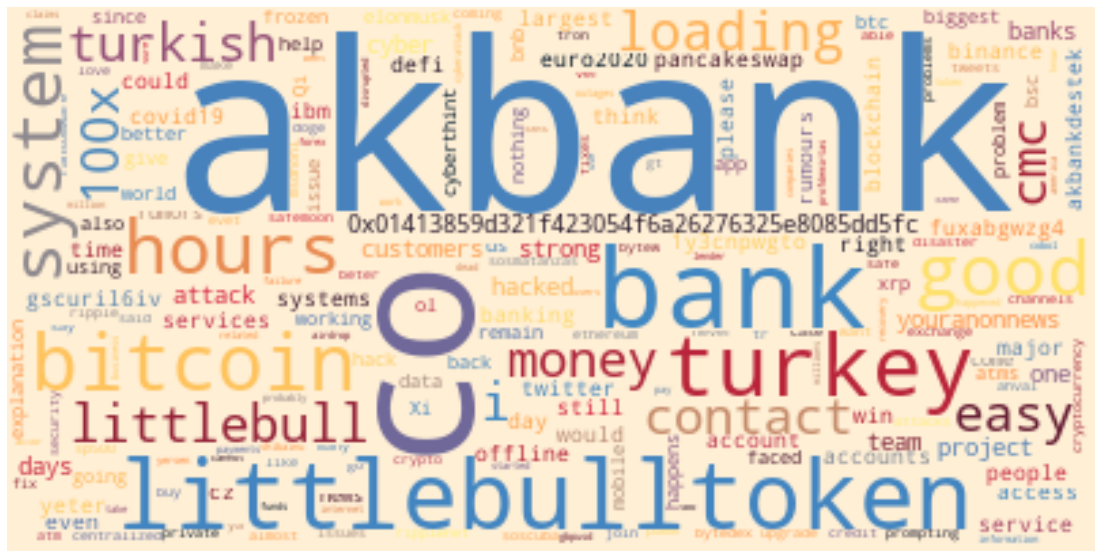

In [11]:
hero.wordcloud(akbank_en['clean_tweet'])

TextBlob

In [12]:
pip install textblob

In [16]:
from textblob import TextBlob

p_yazilarim = []
p_sonuclarim = []

n_yazilarim = []
n_sonuclarim = []

notr_yazilarim = []


for tweet in akbank_en['clean_tweet']:
  blob = TextBlob(tweet)

  if blob.polarity > 0 :
    p_yazilarim.append(tweet)
    p_sonuclarim.append(blob.sentiment)

  elif blob.polarity < 0 :
    n_yazilarim.append(tweet)
    n_sonuclarim.append(blob.sentiment)

  else:
    notr_yazilarim.append(tweet)



Excell olarak kaydetme

In [24]:
pozitifler = pd.DataFrame(p_yazilarim,columns=['Pozitif_yazilar'])
pozitifler['Pozitif_sonuclar'] = p_sonuclarim
pozitifler.head()

pozitifler.to_csv('pozitif_sentiment.csv')

In [25]:
pozitifler.shape

(139, 2)

In [27]:
negatifler = pd.DataFrame(n_yazilarim,columns=['Negatif_yazilar'])
negatifler['Negatif_sonuclar'] = n_sonuclarim
negatifler.head()

negatifler.to_csv('negatif_sentiment.csv')

In [29]:
negatifler.shape

(48, 2)

In [31]:
notrler = pd.DataFrame(notr_yazilarim,columns=['Notr_yazilar'])
notrler.head()

notrler.to_csv('notrler_sentiment.csv')


In [32]:
notrler.shape

(310, 1)

In [33]:
310+48+139

497

NLTK SentimentIntensityAnalyzer()

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

akbank_en['polarity_scores'] = akbank_en['clean_tweet'].apply(lambda x : sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
akbank_en['polarity_scores'] = akbank_en['clean_tweet'].apply(lambda x : sid.polarity_scores(x)['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
akbank_en.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,polarity_scores
31,1414505843891079936,1414505843891079936,2021-07-12 11:44:08 Türkiye Standart Saati,2021-07-12 00:00:00,11:44:08,300.0,9.205248e+07,murat3092,Murat Yıldız,NaN,Instagram takip 👉@finansci_baba #borsa #hisses...,en,[],[],['https://pbs.twimg.com/media/E6FVgPWXsAAmy3H....,0.0,0.0,2.0,"['borsa', 'hissesenedi', 'yatırım', 'garan', '...",[],https://twitter.com/murat3092/status/141450584...,False,NaN,1.0,https://pbs.twimg.com/media/E6FVgPWXsAAmy3H.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,instagram takip finansci baba borsa hissese...,0.0000
413,1413990059217489920,1413940278508009984,2021-07-11 01:34:35 Türkiye Standart Saati,2021-07-11 00:00:00,01:34:35,300.0,1.359501e+18,halidkaradag,XoLiT,NaN,@JackWel5 @crypto_invasion @SEC_Enforcement I ...,en,[],[],[],2.0,0.0,2.0,[],[],https://twitter.com/HalidKaradag/status/141399...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JackWel5', 'name': 'Jack Wel...",NaN,NaN,NaN,NaN,jackwel5 crypto invasion sec enforcement k...,0.3612
437,1413970791969029888,1413908526653639936,2021-07-11 00:18:01 Türkiye Standart Saati,2021-07-11 00:00:00,00:18:01,300.0,1.335399e+18,medsans24,Just M :),NaN,@YourAnonNews @Akbank Heeelp!!!! #SOSCuba #Sos...,en,[],[],[],1.0,0.0,2.0,"['soscuba', 'sosmatanzas', 'soscuba', 'sosmata...",[],https://twitter.com/MeDSans24/status/141397079...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank heeelp soscuba sosmat...,0.0000
445,1413964912678759936,1413908526653639936,2021-07-10 23:54:40 Türkiye Standart Saati,2021-07-10 00:00:00,23:54:40,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank @yuma_mcas require a sho...,en,[],[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank yuma mcas require shor...,0.0000
446,1413964685208989952,1413908526653639936,2021-07-10 23:53:45 Türkiye Standart Saati,2021-07-10 00:00:00,23:53:45,300.0,1.410112e+18,infantryandrew,Andrew,NaN,@YourAnonNews @Akbank Open fire. @yuma_mcas,en,"[{'screen_name': 'yuma_mcas', 'name': 'mcas yu...",[],[],0.0,0.0,0.0,[],[],https://twitter.com/InfantryAndrew/status/1413...,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'YourAnonNews', 'name': 'Anon...",NaN,NaN,NaN,NaN,youranonnews akbank open fire yuma mcas,-0.3400


In [17]:
#Requirements.txt dosyası olusturma
!pip freeze > requirements.txt 

In [ ]:
#Install dependencies from requirements.txt 
!pip install -r requirements.txt